# Disciplina: Ciência de Dados (DCA-0131)
Prof. Luiz Affonso Guedes

### Departamento de Engenharia de Computação e Automação - DCA

UFRN - 2023

*OBS: Favor fazer cópia do notebook antes de alterá-lo.

# AULA 12 - Aprendizagem Supervisionada com o Pacote Sklearn
- Classificador Árvore de Decisão (Decision Tree)
- Classificador Random Forest
- Exercícios com classificadores Decision Tree e Random Forest.


### Site do scikit-learn
http://scikit-learn.org/stable


#### Importação dos pacotes padrões:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



## 1. Árvores de Decisão e Random Forests

Material retirado do GitHub do Jake Vanderplas:

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

As árvores de decisão são uma técnica de aprendizado de máquinas poderosa e popular. O conceito básico é muito semelhante às árvores que você pode ter visto comumente usado para auxiliar na tomada de decisões.

O algoritmo da árvore de decisão é um algoritmo de aprendizagem supervisionado: primeiro construímos a árvore com dados históricos, e depois usamos isso para prever um resultado.

Uma das principais vantagens das árvores de decisão é que elas podem escolher interações não-lineares entre variáveis nos dados, o que a regressão linear não pode.

### Árvore de Decisão no Pacote Scikit-learn


**DecisionTreeClassifier** é uma classe capaz de realizar classificação multi-class sobre um dataset.

Como os outros classificadores no scikit-learn, **DecisionTreeClassifier** tem como entrada 02 arrays: um array X, esparso ou denso, de tamanho [n_samples, n_features] retendo as amostras de treinamento, e um array Y de valores **inteiros**, de tamanho [n_samples], retendo os labels das classes para as amostras de treinamento.

* Material retirado do site do scikit-learn:
http://scikit-learn.org/stable/modules/tree.html

### Exemplo1.1: Dataset Iris

####Criação de uma árvore de decisão

In [5]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

#### Fazendo predição sobre o modelo treinado:

In [3]:
clf.predict([[2., 2.]])

array([1])

#### Método para plotar a Árvore de Decisão

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

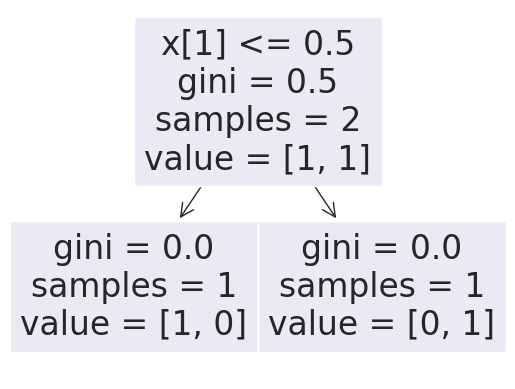

In [6]:
tree.plot_tree(clf)

### Classificação Binária e Multi-Classe
A classe **DecisionTreeClassifier** é capaz de fazer classificação binária (quando os labels são [-1, 1]) e classificação multiclasse (quando os labels são [0, …, K-1]).

Usando o dataset Iris para exemplificar o uso deste classificador como multi-classes.

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# Exemplo de predição
clf.predict(iris.data[:1, :])

array([0])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

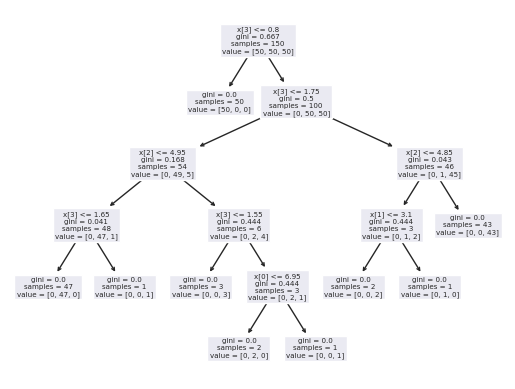

In [10]:
# Plote da árvore obtida
tree.plot_tree(clf)

#### Programa para visualizar a classificação do dataset Iris

Automatically created module for IPython interactive environment


<ipython-input-11-93279e017e1b>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-11-93279e017e1b>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-11-93279e017e1b>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-11-93279e017e1b>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-11-93279e017e1b>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

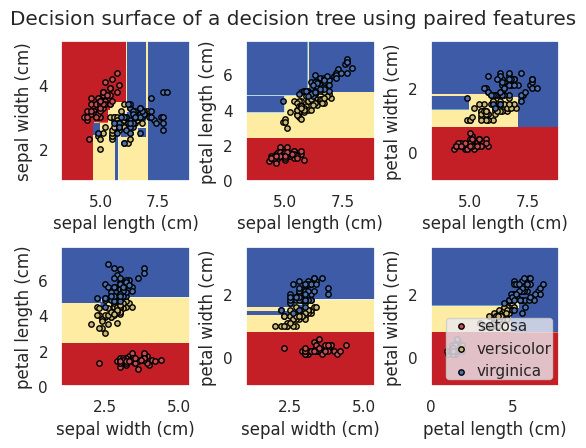

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

### Instalação do pacote Graphviz, para apresentação da árvore de decisão

In [12]:
#!conda install python-graphviz
!pip install graphviz

In [13]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None,
                        feature_names=iris.feature_names,
                        class_names=iris.target_names,
                        filled=True, rounded=True,
                        special_characters=True)
graph = graphviz.Source(dot_data)

ValueError: ignored

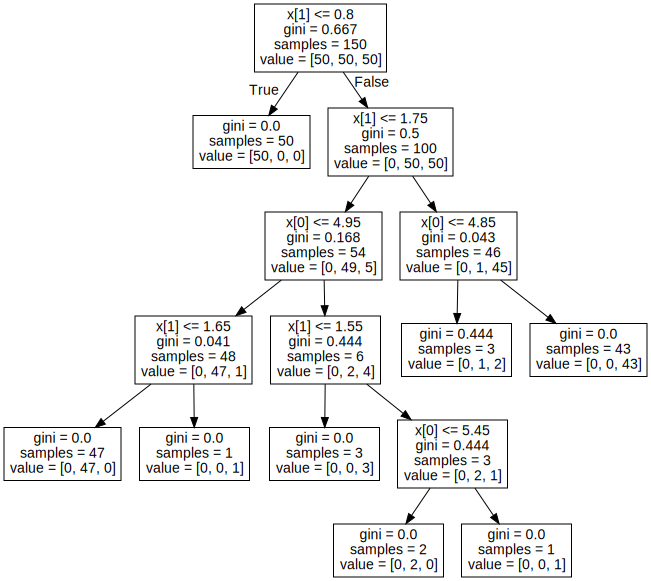

In [15]:
graph

### A árvore resultante pode ser exportada no padrão TXT

In [16]:
# Exemplo de exportação da Decision Tree em modo txt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])

print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



### Classificador DecisionTreeClassifier()
Os principais parâmetros de configuração dessa classe com os seus valores defaults são os seguintes:
- criterion='gini'
- splitter='best'
- max_depth=None
- min_samples_split=2
- min_samples_leaf=1,
- min_weight_fraction_leaf=0.0
- max_features=None
- random_state=None
- max_leaf_nodes=None
- min_impurity_decrease=0.0
- min_impurity_split=None
- class_weight=None

### Exemplo 1.2: Árvore de Decisão com Seleção de Hiperparâmetros
Material retirado do GitHub do Jake Vanderplas:

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb


*   Primeiro, será gerada a base de dados  --> dataset make-blobs
*   Utilização de função construída para visualização dos resultados da classificação.



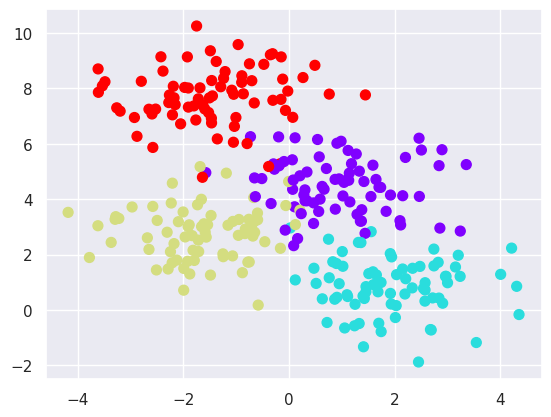

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [18]:
X

array([[ 2.45830537e-02,  2.96215652e+00],
       [-1.52392631e+00,  7.12573205e+00],
       [ 1.27450825e+00,  5.63017322e+00],
       [-8.65523345e-01,  7.80121774e+00],
       [ 7.48740670e-01,  2.55579434e+00],
       [ 4.35918422e+00, -1.62352163e-01],
       [-1.99576820e+00,  7.16440976e-01],
       [ 1.70536064e+00,  4.43277024e+00],
       [ 4.90616903e-01,  8.82985441e+00],
       [-3.52995502e-01,  9.21042408e+00],
       [-1.83601846e+00,  2.68441560e+00],
       [-3.61784268e+00,  8.69951232e+00],
       [ 1.42013331e+00,  4.63746165e+00],
       [-2.88089030e+00,  6.26769229e+00],
       [ 1.05505217e+00, -6.47107437e-01],
       [ 1.05472929e-01,  3.72493766e+00],
       [ 1.13121750e+00,  4.68194985e+00],
       [ 2.91209813e+00,  2.46638067e-01],
       [-7.60240832e-01,  3.27417508e+00],
       [-7.79715679e-01,  1.72893731e+00],
       [ 3.15492712e+00,  1.55292739e+00],
       [ 1.59167155e+00,  1.37914513e+00],
       [ 5.73093132e-01,  5.52623240e+00],
       [-2.

In [19]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

### Módulo para Apresentação do resultado dos classificadores

In [20]:
%%file helpers_05_08.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()

    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])

    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])

    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())

    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)

    interact(fit_randomized_tree, random_state=[0, 100]);

Writing helpers_05_08.py



As figuras a seguir apresentam uma visualização dos primeiros 04 níveis de uma decision tree classifier.

/content/helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
/content/helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
/content/helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
/content/helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


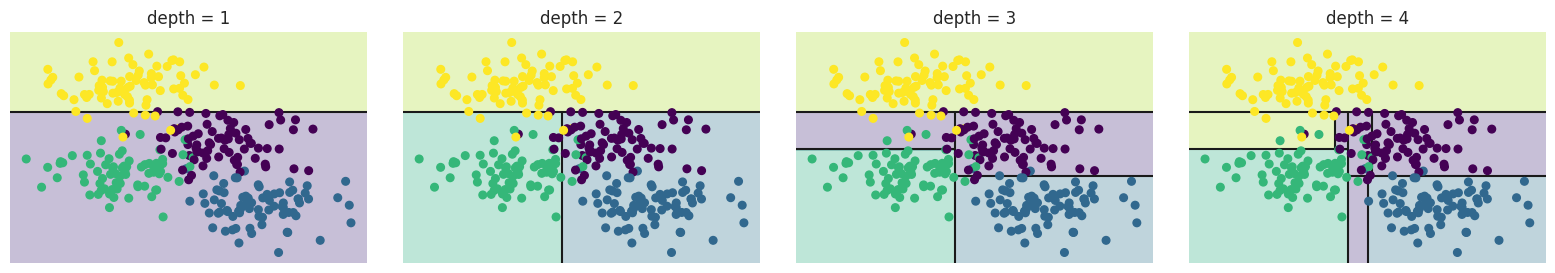

In [21]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs


fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

#fig.savefig('figures/05.08-decision-tree-levels.png')

Este processo de montagem de uma árvore de decisão para nossos dados pode ser feito no Scikit-Learn com o estimador DecisionTreeClassifier:

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

#### Função para Visualização do Resultado

In [23]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

### Resultado da classificação:

<ipython-input-23-a60e81c08b99>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


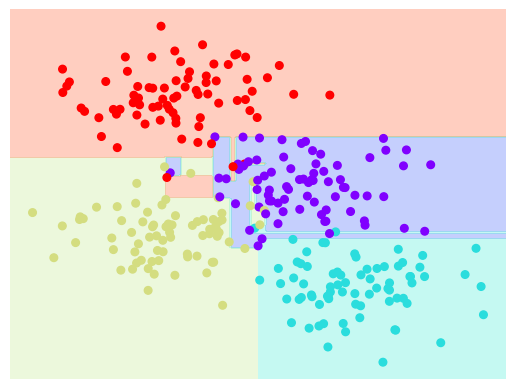

In [24]:
visualize_classifier(DecisionTreeClassifier(), X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

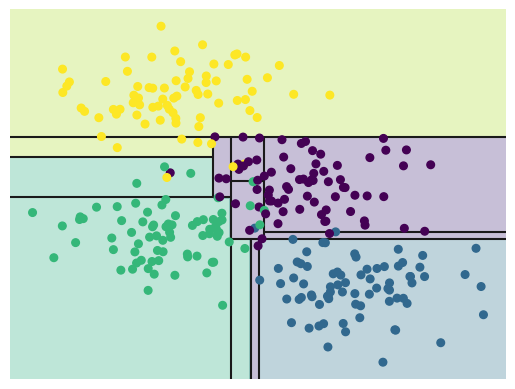

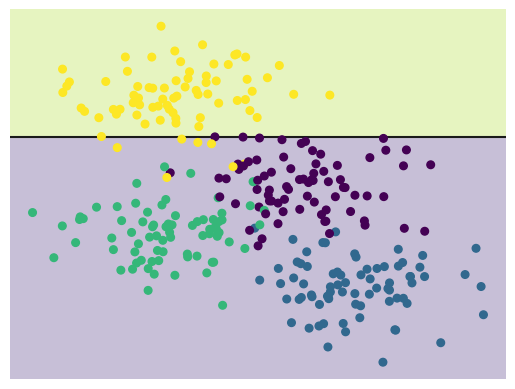

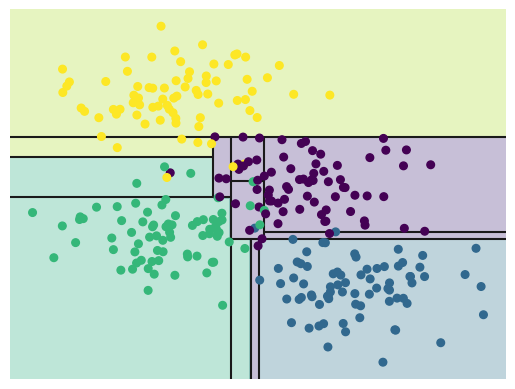

In [25]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

Observe que, à medida que a profundidade aumenta, tendemos a obter regiões de classificação muito estranhamente moldadas; por exemplo, em uma profundidade de cinco, há uma região roxa alta e estreita entre as regiões amarela e azul. É claro que isso é menos resultado da distribuição de dados verdadeira e intrínseca, e mais um resultado das propriedades específicas de amostragem ou ruído dos dados. Ou seja, esta árvore de decisão, mesmo com apenas cinco níveis de profundidade, está claramente altamente especializada nos nossos dados.

### Decision trees e o *over-fitting*

Esse excesso de ajuste acaba por ser uma propriedade geral das árvores de decisão: é muito fácil ir muito fundo na árvore e, portanto, ajustar os detalhes dos dados específicos em vez das propriedades gerais das distribuições de que são retirados. Outra maneira de ver isso em excesso é olhar para modelos treinados em diferentes subconjuntos dos dados.

A seguir são apresentados resultados com conjuntos de dados distintos, que foram escolhidos randomicamente.


interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

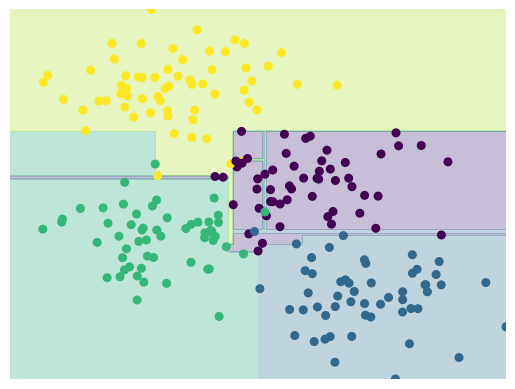

In [27]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

## 2. Combinação de Estimadores (Ensembles of Estimators): Random Forests

Essa noção - que os estimadores de superposição múltipla podem ser combinados para reduzir o efeito dessa superposição - é o que está subjacente a um método de conjunto chamado "bagging". *Bagging* faz uso de um conjunto de estimadores paralelos, cada um dos quais supera os dados e mede os resultados para encontrar uma classificação melhor.

Um conjunto de árvores de decisão aleatorizada é conhecida como floresta aleatória.

Este tipo de classificação pode ser feito manualmente usando o meta-estimador do Ensaio de Bagging do Scikit-Learn, conforme mostrado a seguir.

<ipython-input-23-a60e81c08b99>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


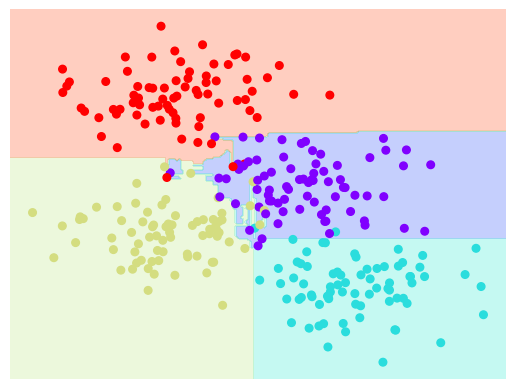

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Neste exemplo, randomizamos os dados ajustando cada estimador com um subconjunto aleatório de 80% dos pontos de treinamento. Na prática, as árvores de decisão são mais efetivamente randomizadas, injetando alguma estocasticidade na forma como as divisões são escolhidas: desta forma, todos os dados contribuem para o ajuste de cada vez, mas os resultados do ajuste ainda possuem aleatoriedade desejada. Por exemplo, ao determinar qual recurso se dividir, a árvore randomizada pode selecionar entre os principais recursos.

No Scikit-Learn, um conjunto otimizado de árvores de decisão randomizadas é implementado no estimador RandomForestClassifier, que cuida de toda a randomização automaticamente. Tudo o que você precisa fazer é selecionar uma série de estimadores, e rapidamente (em paralelo, se desejar) se encaixam no conjunto de árvores.

Site do Scikit-learn: Random Forest:
http://scikit-learn.org/stable/modules/ensemble.html#forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<ipython-input-23-a60e81c08b99>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


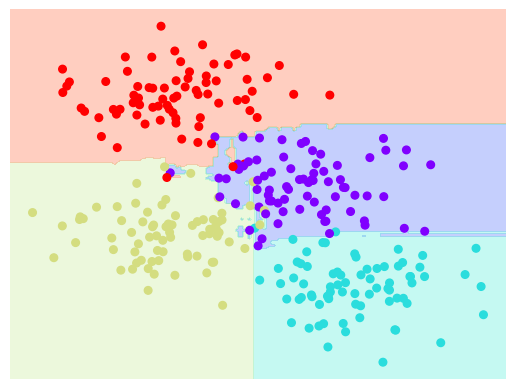

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)



Verificamos que, com a média de mais de 100 modelos perturbados aleatoriamente, acabamos com um modelo geral que está muito mais próximo de nossa intuição sobre como o espaço de parâmetros deve ser dividido.

### Exercício 2.1: Random Forest para classificação de Dígitos


In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Para nos lembrar o que estamos vendo, visualizaremos os primeiros pontos de dados:

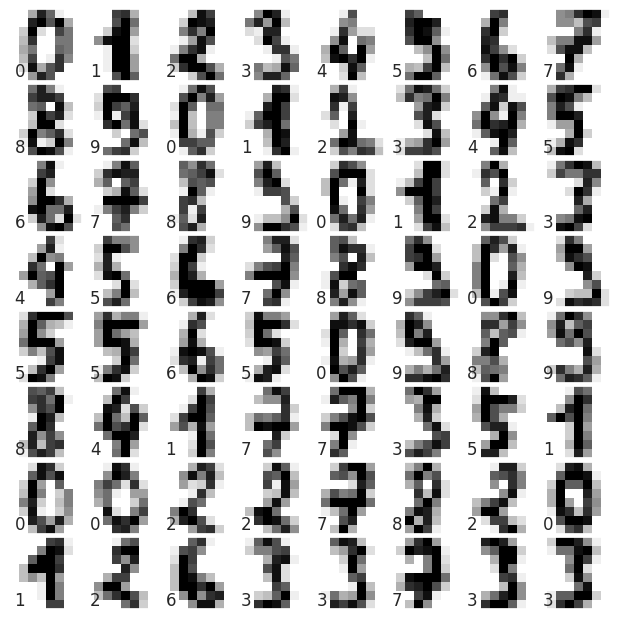

In [31]:
# Configuração da Figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot dos dígitos: cada imagem contém 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label da imagem com o valor da sua target
    ax.text(0, 7, str(digits.target[i]))

Podemos classificar rapidamente os dígitos usando uma Random Florest da seguinte maneira:

In [92]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Podemos dar uma olhada no relatório de classificação para este classificador:

In [93]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



E, para uma boa medida, trace a matriz de confusão:

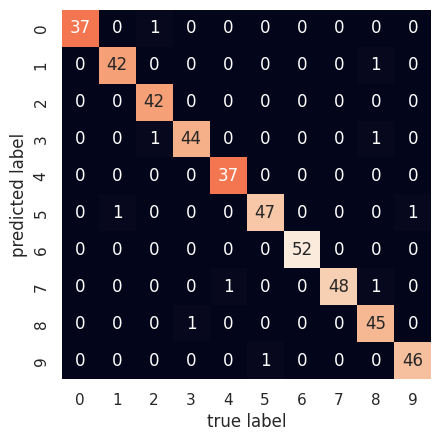

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Exercício 2.2: Dados do Censo Americano

Examinaremos a renda individual nos Estados Unidos. Os dados são do censo de 1994 e contêm informações sobre o estado civil, a idade, o tipo de trabalho e mais do indivíduo. A coluna de destino (target), ou o que queremos prever, é predizer se os indivíduos ganham menos ou igual a 50k por ano ou mais de 50k por ano, a partir dos outros dados.


Os dados podem ser obtidos a partir do website da University of California at Irvine.

http://archive.ics.uci.edu/ml/datasets/Adult

In [37]:
import pandas

# Set index_col to False to avoid pandas thinking that the first column is row indexes (it's age)
#income = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", index_col=False)

income = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")


In [39]:
# Apresenta as 5 primeira linhas do DataFrame
display(income.head(5))

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [41]:
# Apresenta a primeira linha do DataFrame
display(income.head(1))

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [42]:
income.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

#### Inclusão dos nomes das colunas
Esse DataFrame não tem nomes de colunas (features e target)
- Necessidade de incluir nomes nas colunas.    

Nomes das colunas do DataFrame:
Verifique em http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names o significado das colunas.
    
- age
- workclass
- fnlwgt
- education
- education_num
- marital_status
- occupation
- relationship
- race
- sex
- capital_gain
- capital_loss
- hours_per_week
- native_country
- high_income

In [43]:
# Inclusão dos nomes das colunas
income.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "high_income"]


In [44]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income'],
      dtype='object')

In [46]:
display(income.head(1))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


#### Verificação do conteúdo da feature "workclass"

In [47]:
print(income["workclass"].head(5))

0     Self-emp-not-inc
1              Private
2              Private
3              Private
4              Private
Name: workclass, dtype: object


Como a feature é um dado categórico (expresso em texto), há a necessidade de convertê-lo em valor numérico:

In [54]:
import pandas

In [56]:
# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical(income["workclass"])
income["workclass"] = col.codes
print(income["workclass"].head(5))

0    6
1    4
2    4
3    4
4    4
Name: workclass, dtype: int8


O valor 'Private' na coluna 'workclass' foi mapeado para o código numérico 4 (podemos verificar isso comparando os valores na coluna da classe de trabalho que costumava ter o rótulo 'Private' com os valores atuais para ver onde eles se alinham).

In [57]:
# Enter your code here
private_incomes = income[income["workclass"] == 4]
public_incomes = income[income["workclass"] != 4]

print(private_incomes.shape)
print(public_incomes.shape)

(22696, 15)
(9864, 15)


Executer a linha a baixo e verifique como o Pandas processa as sub-tabela

In [61]:
income["workclass"] == 4

0        False
1         True
2         True
3         True
4         True
         ...  
32555     True
32556     True
32557     True
32558     True
32559    False
Name: workclass, Length: 32560, dtype: bool

#### Instrução:

Converte as outras variáveis categóricas de texto para numérica:
- education
- marital_status
- occupation
- relationship
- race
- sex
- native_country
- high_income

In [62]:
# Conversão das variáveis categóricas de texto para numérica

# education
col = pandas.Categorical(income["education"])
income["education"] = col.codes

# marital_status

col = pandas.Categorical(income["marital_status"])
income["marital_status"] = col.codes

# occupation
col = pandas.Categorical(income["occupation"])
income["occupation"] = col.codes

# relationship
col = pandas.Categorical(income["relationship"])
income["relationship"] = col.codes

# race
col = pandas.Categorical(income["race"])
income["race"] = col.codes

# sex
col = pandas.Categorical(income["sex"])
income["sex"] = col.codes

# native_country
col = pandas.Categorical(income["native_country"])
income["native_country"] = col.codes

# high_income
col = pandas.Categorical(income["high_income"])
income["high_income"] = col.codes

In [64]:
display(income.head(5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


#### Transformando Variáveis categórica para o Padrão do SciKitLearn

Uma maneira é transformar as variáveis para tipo 'dummy'.

- Exemplo:

     df = pd.get_dummies(df, columns=['type'])

Os códigos categóricos são apenas valores inteiros para os itens exclusivos na categoria dada. Em contraste, get_dummies() retorna uma nova coluna para cada item exclusivo. O valor na coluna indica se a gravação possui ou não esse atributo.




In [65]:
#Exemplo de Uso
df = pandas.DataFrame({'cat': pandas.Categorical(['a', 'a', 'a', 'b', 'b', 'c', 'd', 'a'])})
df2 = pandas.DataFrame({'cat': [1, 1, 1, 2, 2, 3]})

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   cat     8 non-null      category
dtypes: category(1)
memory usage: 340.0 bytes


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cat     6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


In [71]:
pandas.get_dummies(df)

,cat_a,cat_b,cat_c,cat_d
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,0,1
7,1,0,0,0


#### Importação do conjunto de Teste
- Importação do conjunto de teste
- Inclusão dos títulos das colunas
- Conversão das variáveis textuais

In [76]:

income_test = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")

print(income_test.head(5))

                                                                                                                                |1x3 Cross validator
25  Private   226802  11th         7   Never-married       Machine-op-inspct  Own-child  Black  Male   0    0 40  United-States               <=50K.
38  Private   89814   HS-grad      9   Married-civ-spouse  Farming-fishing    Husband    White  Male   0    0 50  United-States               <=50K.
28  Local-gov 336951  Assoc-acdm   12  Married-civ-spouse  Protective-serv    Husband    White  Male   0    0 40  United-States                >50K.
44  Private   160323  Some-college 10  Married-civ-spouse  Machine-op-inspct  Husband    Black  Male   7688 0 40  United-States                >50K.
18  ?         103497  Some-college 10  Never-married       ?                  Own-child  White  Female 0    0 30  United-States               <=50K.


In [78]:
income_test = income_test.reset_index()
display(income_test.head(5))

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,|1x3 Cross validator
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [81]:
# Inclusão dos títulos das colunas

income_test.columns = [ "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "high_income"]


In [82]:
display(income_test.head(5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [84]:
# Conversão das variáveis categóricas textuais para munéricas

# workclass
col = pandas.Categorical(income_test["workclass"])
income_test["workclass"] = col.codes

# education
col = pandas.Categorical(income_test["education"])
income_test["education"] = col.codes

# marital_status

col = pandas.Categorical(income_test["marital_status"])
income_test["marital_status"] = col.codes

# occupation
col = pandas.Categorical(income_test["occupation"])
income_test["occupation"] = col.codes

# relationship
col = pandas.Categorical(income_test["relationship"])
income_test["relationship"] = col.codes

# race
col = pandas.Categorical(income_test["race"])
income_test["race"] = col.codes

# sex
col = pandas.Categorical(income_test["sex"])
income_test["sex"] = col.codes

# native_country
col = pandas.Categorical(income_test["native_country"])
income_test["native_country"] = col.codes

# high_income
col = pandas.Categorical(income_test["high_income"])
income_test["high_income"] = col.codes


In [85]:
display(income_test.head(5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


### Usando o SciKitLearn

Podemos usar o pacote scikit-learn para se treinar uma árvore de decisão. A interface é muito semelhante a dos outros algoritmos de classificação.
- Utiliza-se a classe DecisionTreeClassifier para problemas de classificação
- Utiliza-se a classe DecisionTreeRegressor para problemas de regressão.
- O pacote sklearn.tree inclui ambas as classes.


Neste caso, como queremos um resultado binário, usaremos um classificador.

O primeiro passo é treinar o classificador nos dados.
- Usaremos o método de ajuste em um classificador para fazer isso.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Um lista de colunas para treino
# Os valores já foram convertido para numérico.
features = income[["age", "workclass","education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]]
target = income["high_income"]


In [107]:
features.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,50,6,13,2,4,0,4,1,13,39
1,38,4,9,0,6,1,4,1,40,39
2,53,4,7,2,6,0,2,1,40,39
3,28,4,13,2,10,5,2,0,40,5
4,37,4,14,2,4,5,4,0,40,39


In [108]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: high_income, dtype: int8

In [109]:
# Instanciar o Classificador
# Setar "random_state" para 1 --> para se certificar que os reultados são consistentes
clf = DecisionTreeClassifier(random_state=1)

# A variável "income" já foi carregada.
clf.fit(features, target)

DecisionTreeClassifier(random_state=1)

#### Testando a precisão do modelo

Agora que nos treinamos o modelo, podemos fazer previsões.

- É preciso dividir os dados em conjuntos de treinamento e testes primeiro.
- Se não o fizermos, estaremos fazendo previsões sobre os mesmos dados com os quais treinamos nosso algoritmo.
- Isso leva a 'overfit', e fará com que nosso erro pareça mais baixo do que é.

Precisamos, então, dividir nossos dados em conjuntos de treinamento e testes primeiro.

In [110]:
# Exemplo de predição
# utilize o conjunto de tests para fazer as predições

from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features,target,random_state=1)

# Setar "random_state" para 1 --> para se certificar que os reultados são consistentes
clf = DecisionTreeClassifier(random_state=1)

# A variável "income" já foi carregada.
clf.fit(feature_train, target_train)

predictions = clf.predict(feature_test)

In [111]:
from sklearn import metrics
ypred = predictions
ytest = target_test
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6294
           1       0.53      0.54      0.53      1846

    accuracy                           0.79      8140
   macro avg       0.69      0.70      0.70      8140
weighted avg       0.79      0.79      0.79      8140



In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.785012285012285

#### Exercício: Utilize a matriz de Confusão para analisar a qualidade da classificação.

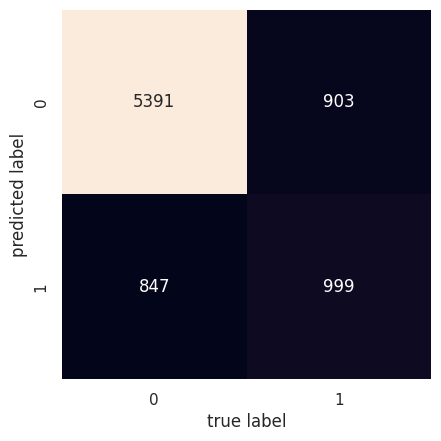

In [113]:
# Matriz de confusão do classificador
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


#### Analise a influência de parâmetros sobre desempenho de árvores de decisão
- parâmetro "tamanho do conjunto de treino"
- parâmetro "número de níveis da árvore.

In [115]:
# Modelos de Decision - Análise de desempenho paramétrico

#clf = DecisionTreeClassifier(random_state=1)
#clf = DecisionTreeClassifier(min_samples_split=13, random_state=1)
#clf = DecisionTreeClassifier(random_state=1, min_samples_split=13, max_depth=7)

clf = DecisionTreeClassifier(random_state=1, min_samples_split=100, max_depth=10)

clf.fit(features, target)
predictions = clf.predict(feature_test)

ypred = predictions
ytest = target_test
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6411
           1       0.61      0.67      0.64      1729

    accuracy                           0.84      8140
   macro avg       0.76      0.78      0.77      8140
weighted avg       0.85      0.84      0.84      8140



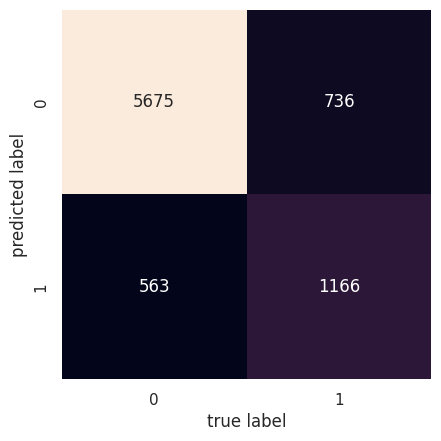

In [116]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Exercício 3: Random Forest
- Utilize a técnica de Random Forest para classificar a variável "high_income" do exercíco anterior.

In [117]:
# Resolução do problema
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(features, target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [118]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6480
           1       0.55      0.65      0.60      1660

    accuracy                           0.82      8140
   macro avg       0.73      0.76      0.74      8140
weighted avg       0.83      0.82      0.83      8140



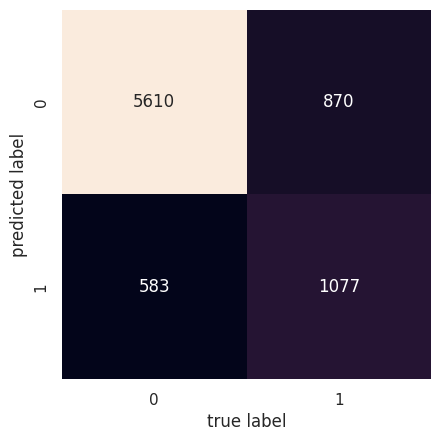

In [119]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');